In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import cmocean

CMAP = cmocean.cm.balance
CMAP = seaborn.cm.icefire
import h5py
f = h5py.File('../../Decay_Turbulence_small/train/Decay_turb_small_128x128_125.h5','r')
print(f['tasks']['u'].shape)
w = f['tasks']['vorticity'][:]
u = f['tasks']['u'][:]
v = f['tasks']['v'][:]
import numpy as np

def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.

    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (x.max()-x.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof

(2000, 128, 128)


In [5]:
u_mean = np.mean(u, axis = 0)
v_mean = np.mean(v, axis = 0)
true_u = u - u_mean
true_v = v - v_mean
tke = 0.5*np.mean(true_u**2 + true_v**2,axis=0)

print(tke.shape)

def tke2spectrum(tke):
    sp = np.fft.fft2(tke)
    sp = np.fft.fftshift(sp)
    sp = np.real(sp*np.conjugate(sp))
    sp1D = azimuthalAverage(sp)
    return sp1D

spec = np.array([tke2spectrum(tke[i]) for i in range(tke.shape[0])])
x,s = np.mean(spec, axis = 0), np.std(spec, axis = 0)
x_idx = np.array(list(range(0,30)))
plt.plot(x_idx,s[:30])
plt.loglog()

(128, 128)


IndexError: index -2 is out of bounds for axis 0 with size 1


Reading files...localtime Sun Sep  3 20:34:45 2023
shape of data =  (2000, 2, 128, 128)
Reading files...localtime Sun Sep  3 20:34:45 2023 - END

Computing spectrum...  Sun Sep  3 20:34:45 2023
N = 128
box sidex     = 128
box sidey     = 128
sphere radius = 92
centerbox     = 64
centerboy     = 64
65
Real      Kmax    =  65
Spherical Kmax    =  92
the KE  of the mean velocity discrete  =  1.7614263550751214e-17
the KE  of the mean velocity sphere    =  1.9168394459563786e-17
the mean KE discrete  =  0.1491922289133072
the mean KE sphere    =  0.14919222787041564
Computing spectrum...  Sun Sep  3 20:34:45 2023 - END 



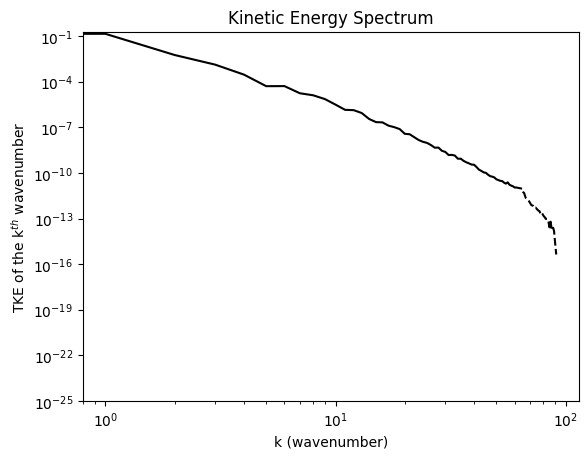

In [2]:
# python 3

# Script for the computation of 3D spectrum of the Total Kinetic Energy
# Adapted to the Taylor-Green vortex (TGV) problem.
# CREATED by FARSHAD NAVAH
# McGill University
# farshad.navah .a.t. mail.mcgill.ca
# 2018
# provided as is with no garantee.
# Please cite:
#    https://github.com/fanav/Energy_Spectrum
#    https://arxiv.org/abs/1809.03966

# -----------------------------------------------------------------
#  IMPORTS - ENVIRONMENT
# -----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt

# -----------------------------------------------------------------
#  TGV QUANTS
# -----------------------------------------------------------------

# These quantities are to account for particular non-dimensionalizations of state variables.
# In general U0=1.
c  = sqrt(1.4);
Ma = 0.1;
U0 = Ma*c; 

# -----------------------------------------------------------------
#  INPUT FILE PARAMS
# -----------------------------------------------------------------

# -----------------------------------------------------------------
#  OUTOUT FILE PARAMS
# -----------------------------------------------------------------

Figs_Path = "./"
Fig_file_name = "Ek_Spectrum"

# -----------------------------------------------------------------
#  READ FILES
# -----------------------------------------------------------------

localtime = time.asctime( time.localtime(time.time()) )
print ("\nReading files...localtime",localtime)

#load the ascii file
data = np.stack((u,v),axis=1)

print ("shape of data = ",data.shape)

localtime = time.asctime( time.localtime(time.time()) )
print ("Reading files...localtime",localtime, "- END\n")

# -----------------------------------------------------------------
#  COMPUTATIONS
# -----------------------------------------------------------------
localtime = time.asctime( time.localtime(time.time()) )
print ("Computing spectrum... ",localtime)

N = data.shape[-1]
print("N =",N)
eps = 1e-50 # to void log(0)

U = data[:,0].mean(axis=0)
V = data[:,1].mean(axis=0)
# U = data[:,3].reshape(N,N,N)/U0
# V = data[:,4].reshape(N,N,N)/U0
# W = data[:,5].reshape(N,N,N)/U0

amplsU = abs(np.fft.fftn(U)/U.size)
amplsV = abs(np.fft.fftn(V)/V.size)
# amplsW = abs(np.fft.fftn(W)/W.size)

EK_U  = amplsU**2
EK_V  = amplsV**2 
# EK_W  = amplsW**2 

EK_U = np.fft.fftshift(EK_U)
EK_V = np.fft.fftshift(EK_V)
# EK_W = np.fft.fftshift(EK_W)

sign_sizex = np.shape(EK_U)[0]
sign_sizey = np.shape(EK_U)[1]
# sign_sizez = np.shape(EK_U)[2]

box_sidex = sign_sizex
box_sidey = sign_sizey
# box_sidez = sign_sizez

# box_radius = int(np.ceil((np.sqrt((box_sidex)**2+(box_sidey)**2+(box_sidez)**2))/2.)+1)
box_radius = int(np.ceil((np.sqrt((box_sidex)**2+(box_sidey)**2))/2.)+1)
centerx = int(box_sidex/2)
centery = int(box_sidey/2)
# centerz = int(box_sidez/2)

print ("box sidex     =",box_sidex) 
print ("box sidey     =",box_sidey) 
# print ("box sidez     =",box_sidez)
print ("sphere radius =",box_radius )
print ("centerbox     =",centerx)
print ("centerboy     =",centery)
# print ("centerboz     =",centerz,"\n" )
	            
EK_U_avsphr = np.zeros(box_radius,)+eps ## size of the radius
EK_V_avsphr = np.zeros(box_radius,)+eps ## size of the radius
# EK_W_avsphr = np.zeros(box_radius,)+eps ## size of the radius

# for i in range(box_sidex):
# 	for j in range(box_sidey):
# 		for k in range(box_sidez):            
# 			wn =  int(np.round(np.sqrt((i-centerx)**2+(j-centery)**2+(k-centerz)**2)))
# 			EK_U_avsphr[wn] = EK_U_avsphr [wn] + EK_U [i,j,k]
# 			EK_V_avsphr[wn] = EK_V_avsphr [wn] + EK_V [i,j,k]    
# 			EK_W_avsphr[wn] = EK_W_avsphr [wn] + EK_W [i,j,k]        
for i in range(box_sidex):
	for j in range(box_sidey):          
		wn =  int(np.round(np.sqrt((i-centerx)**2+(j-centery)**2)))
		EK_U_avsphr[wn] = EK_U_avsphr [wn] + EK_U [i,j]
		EK_V_avsphr[wn] = EK_V_avsphr [wn] + EK_V [i,j]     
EK_avsphr = 0.5*(EK_U_avsphr + EK_V_avsphr)
	                      
fig = plt.figure()
plt.title("Kinetic Energy Spectrum")
plt.xlabel(r"k (wavenumber)")
plt.ylabel(r"TKE of the k$^{th}$ wavenumber")

realsize = len(np.fft.rfft(U[:,0]))
print(realsize)
plt.loglog(np.arange(0,realsize),((EK_avsphr[0:realsize] )),'k')
plt.loglog(np.arange(realsize,len(EK_avsphr),1),((EK_avsphr[realsize:] )),'k--')
axes = plt.gca()
axes.set_ylim([10**-25,5**-1])

print("Real      Kmax    = ",realsize)
print("Spherical Kmax    = ",len(EK_avsphr))

TKEofmean_discrete = 0.5*(np.sum(U/U.size)**2+np.sum(V/V.size)**2)
TKEofmean_sphere   = EK_avsphr[0]

total_TKE_discrete = np.sum(0.5*(U**2+V**2))/(N*1.0)**2
total_TKE_sphere   = np.sum(EK_avsphr)

print("the KE  of the mean velocity discrete  = ",TKEofmean_discrete)
print("the KE  of the mean velocity sphere    = ",TKEofmean_sphere )
print("the mean KE discrete  = ",total_TKE_discrete)
print("the mean KE sphere    = ",total_TKE_sphere)

localtime = time.asctime( time.localtime(time.time()) )
print ("Computing spectrum... ",localtime, "- END \n")

# -----------------------------------------------------------------
#  OUTPUT/PLOTS
# -----------------------------------------------------------------

dataout      = np.zeros((box_radius,2)) 
dataout[:,0] = np.arange(0,len(dataout))
dataout[:,1] = EK_avsphr[0:len(dataout)]

# np.savetxt(Figs_Path+Fig_file_name+'.dat',dataout)
fig.savefig(Figs_Path+Fig_file_name+'.pdf')

In [3]:

def TKE(preds):
    mean_flow = np.expand_dims(np.mean(preds, axis = 1), axis = 1)
    tur_preds = np.mean((preds - mean_flow)**2, axis = 1)
    tke = (tur_preds[0] + tur_preds[1])/2
    return tke

def tke2spectrum(tke):
    """Convert TKE field to spectrum"""
    sp = np.fft.fft2(tke)
    sp = np.fft.fftshift(sp)
    sp = np.real(sp*np.conjugate(sp))
    sp1D = radialProfile.azimuthalAverage(sp)
    return sp1D 

def spectrum_band(tensor):
    tensor = inverse_seqs(tensor)
    spec = np.array([tke2spectrum(TKE(tensor[i])) for i in range(tensor.shape[0])])
    return np.mean(spec, axis = 0), np.std(spec, axis = 0)

def inverse_seqs(tensor):
    tensor = tensor.reshape(-1,7, 60, 2, 64, 64)
    tensor = tensor.transpose(0,2,3,1,4,5)
    tensor = tensor.transpose(0,1,2,4,3,5).reshape(-1, 60, 2, 64, 448)
    tensor = tensor.transpose(0,2,1,3,4)
    return tensor

def TKE_mean(tensor):
    if tensor.shape[-1] == 448:
        return TKE(tensor)
    tensor = inverse_seqs(tensor)
    tke_mean = 0
    for i in range(0,min(70,tensor.shape[0])):
        tke_mean += TKE(tensor[i])
    tke_mean = tke_mean/tensor.shape[0]
    return tke_mean



In [4]:
import torch
import numpy as np
import time
from torch_spec_operator import img, rfftfreqs, fftfreqs, spec_grad, pad_rfft3, pad_irfft3


##################### UTILITIES ###########################


def energy_spectrum(vel):
    """
    Compute energy spectrum given a velocity field
    :param vel: tensor of shape (N, 3, res, res, res)
    :return spec: tensor of shape(N, res/2)
    :return k: tensor of shape (res/2,), frequencies corresponding to spec
    """
    device = vel.device
    res = vel.shape[-2:]

    assert(res[0] == res[1])
    r = res[0]
    k_end = int(r/2)
    vel_ = pad_rfft3(vel, onesided=False) # (N, 3, res, res, res, 2)
    uu_ = (torch.norm(vel_, dim=-1) / r**3)**2
    e_ = torch.sum(uu_, dim=1)  # (N, res, res, res)
    k = fftfreqs(res).to(device) # (3, res, res, res)
    rad = torch.norm(k, dim=0) # (res, res, res)
    k_bin = torch.arange(k_end, device=device).float()+1
    bins = torch.zeros(k_end+1).to(device)
    bins[1:-1] = (k_bin[1:]+k_bin[:-1])/2
    bins[-1] = k_bin[-1]
    bins = bins.unsqueeze(0)
    bins[1:] += 1e-3
    inds = torch.searchsorted(bins, rad.flatten().unsqueeze(0)).squeeze().int()
    # bincount = torch.histc(inds.cpu(), bins=bins.shape[1]+1).to(device)
    bincount = torch.bincount(inds)
    asort = torch.argsort(inds.squeeze())
    sorted_e_ = e_.view(e_.shape[0], -1)[:, asort]
    csum_e_ = torch.cumsum(sorted_e_, dim=1)
    binloc = torch.cumsum(bincount, dim=0).long()-1
    spec_ = csum_e_[:,binloc[1:]] - csum_e_[:,binloc[:-1]]
    spec_ = spec_[:, :-1]
    spec_ = spec_ * 2 * np.pi * (k_bin.float()**2) / bincount[1:-1].float()
    return spec_, k_bin


##################### COMPUTE STATS ###########################

def tkenergy(vel, avg=True):
    """
    compute total kinetic energy inside system
    :param vel: tensor of shape (N, 3, res, res, res)
    """

    tke = 0.5 * (vel[:, 0] **2 + vel[:, 1] **2)

    if avg:
        return torch.mean(tke, dim=(1, 2))     # N, 1
    else:
        return tke                             # N, res, res

def dissipation(vel, viscosity=0.000185, avg=True):
    """
    compute total energy dissipation inside system
    :param vel: tensor of shape (N, 3, res, res, res)
    """
    vel_ = pad_rfft3(vel) # (N, 3, res, res, res/2+1, 2)
    # print("vel_.shape",vel_.shape)
    grad_ = spec_grad(vel_)   # (N, 3, 3, res, res, res/2+1, 2)
    # print("grad_.shape", grad_.shape)
    grad_t_ = grad_.transpose(1, 2)
    strain_ = 0.5 * (grad_ + grad_t_) # (N, 3, 3, res, res, res/2+1, 2)
    # print("strain_.shape", strain_.shape)
    strain = pad_irfft3(strain_) # (N, 3, 3, res, res, res)
    # print("strain.shape", strain.shape)
    diss = 2 * viscosity * torch.sum(strain**2, dim=(1, 2)) # (N, res, res, res)
    # print("diss.shape",diss.shape)
    if avg:
        return torch.mean(diss, dim=(1, 2))
    else:
        return diss

def rmsvelocity(vel, avg=True):
    """
    compute RMS velocity
    :param vel: tensor of shape (N, 3, res, res, res)
    """
    rmsv = (tkenergy(vel, avg=False) * (2/3))**(1/2)
    # print("rmsv.shape",rmsv.shape)
    if avg:
        return torch.mean(rmsv, dim=(1, 2))
    else:
        return rmsv

def tmscale(vel, viscosity=0.000185, avg=True):
    """
    compute Taylor Micro Scale
    :param vel: tensor of shape (N, 3, res, res, res)
    """
    rmsv = rmsvelocity(vel, avg=False)
    diss = dissipation(vel, avg=False, viscosity=viscosity)
    lambd = (15*viscosity*(rmsv**2)/diss)**(1/2)
    if avg:
        return torch.mean(lambd, dim=(1, 2))
    else:
        return lambd

def tsreynolds(vel, viscosity=0.000185, avg=True):
    """
    compute Taylor-scale Reynolds number
    :param vel: tensor of shape (N, 3, res, res, res)
    """
    rmsv = rmsvelocity(vel, avg=False)
    lambd = tmscale(vel, viscosity=viscosity, avg=False)
    rey = rmsv * lambd / viscosity
    if avg:
        return torch.mean(rey, dim=(1, 2))
    else:
        return rey

def ktimescale(vel, viscosity=0.000185, avg=True):
    """
    compute Kolmogorov time scale
    :param vel: tensor of shape (N, 3, res, res, res)
    """
    diss = dissipation(vel, viscosity, False)
    tau = (viscosity/diss)**(1/2)
    if avg:
        return torch.mean(tau, dim=(1, 2))
    else:
        return tau

def klenscale(vel, viscosity=0.000185, avg=True):
    """
    compute Kolmogorov length scale
    :param vel: tensor of shape (N, 3, res, res, res)
    """
    diss = dissipation(vel, viscosity, False)
    eta = viscosity**(3/4) * diss**(-1/4)
    if avg:
        return torch.mean(eta, dim=(1, 2))
    else:
        return eta

def intscale(vel, avg=True):
    """
    compute integral scale
    :param vel: tensor of shape (N, 3, res, res, res)
    """
    spec, k = energy_spectrum(vel)
    rmsv = rmsvelocity(vel, avg=False)

    c1 = np.pi/(2*rmsv**2)
    c2 = torch.sum(spec / k, dim=1)
    L = c1*(c2.unsqueeze(1).unsqueeze(1))
    if avg:
        return torch.mean(L, dim=(1, 2))
    else:
        return L

def eddytime(vel, avg=True):
    """
    compute large eddy turnover time
    :param vel: tensor of shape (N, 3, res, res, res)
    """
    L = intscale(vel)
    rmsv = rmsvelocity(vel, avg=False)
    # print(L.shape, rmsv.shape)
    TL = L.unsqueeze(1).unsqueeze(1) / rmsv
    if avg:
        return torch.mean(TL, dim=(1, 2))
    else:
        return TL

def compute_all_stats(vel, viscosity=0.000185, description=False):
    """
    compute all statistics
    :param vel: tensor of shape (N, 3, res, res, res)
    """

    spec, k = energy_spectrum(vel)

    tk = tkenergy(vel, avg=True)
    dis = dissipation(vel, avg=True)
    rms = (tk * (2 / 3)) ** (1 / 2)

    tkenergy_ = torch.mean(tk)
    dissipation_ = torch.mean(dis)
    rmsvelocity_ = torch.mean(rms)

    tm = (15 * viscosity * (rms ** 2) / dis) ** (1 / 2)
    tmscale_ = torch.mean(tm)

    tsreynolds_ = torch.mean(rms * tm / viscosity)

    ktimescale_ = torch.mean(torch.sqrt(viscosity / dis))
    klenscale_ = torch.mean(viscosity ** (3 / 4) * dis ** (-1 / 4))

    intscale = np.pi / (2 * rms ** 2) * torch.sum(spec / k, dim=1)
    intscale_ = torch.mean(intscale)

    eddytime_ = torch.mean(intscale / rms)

    stats = [tkenergy_, dissipation_, rmsvelocity_, tmscale_, tsreynolds_, ktimescale_, klenscale_, intscale_, eddytime_]
    stats = torch.stack(stats, dim=-1)
    descript = ["total kinetic energy", "total energy dissipation", "RMS velocity", "Taylor Micro Scale", "Taylor-scale Reynolds number", "Kolmogorov time scale", "Kolmogorov length scale", "integral scale", "large eddy turnover time"]
    if description:
        return stats, descript
    else:
        return stats


def test():
    dir = "./data/rb2d_ra1e6_s42.npz"
    npdata = np.load(dir)
    data = np.stack([npdata['p'], npdata['b'], npdata['u'], npdata['w']], axis=0)
    uw = np.transpose(data[2:, :, :, :], (1, 0, 2, 3))[:, :, :128, :]    #(2, N, 512, 128) -> (N, 2, 128, 128)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    uw = torch.tensor(uw, device=device).float()
    print(uw.shape)
    t0 = time.time()
    stats = compute_all_stats(uw[10:,:,:,:], viscosity=0.0001, description=False)
    t1 = time.time()

    s = [stats[..., i].item() for i in range(stats.shape[0])]
    print("********** Compute time for stats **********")
    print("{0:5.3f} s".format(t1-t0))
    print("************* Flow Statistics *************")
    print("Total Kinetic Energy     : {}".format(s[0]))
    print("Dissipation              : {}".format(s[1]))
    print("Rms velocity             : {}".format(s[2]))
    print("Taylor Micro. Scale      : {}".format(s[3]))
    print("Taylor-scale Reynolds    : {}".format(s[4]))
    print("Kolmogorov time sclae    : {}".format(s[5]))
    print("Kolmogorov length sclae  : {}".format(s[6]))
    print("Integral scale           : {}".format(s[7]))
    print("Large eddy turnover time : {}".format(s[8]))

if __name__ == '__main__':
    test()






ModuleNotFoundError: No module named 'torch_spec_operator'